### 문제 1.1. 랜덤워크 시계열 만들기

$X_{t}=X_{t-1}+\varepsilon_{t}$의 형태를 따르는 행보를 랜덤워크 과정이라고 부릅니다. 초기 값을 지정하면 100기간의 랜덤워크 시계열을 생성하는 함수를 만들어 주세요. 이때 $\varepsilon_{t}$는 $N(0,1)$의 확률분포를 따르는 시계열입니다.  다음 코드를 이용해 $\varepsilon_{t}$을 만들 수 있습니다.



<function matplotlib.pyplot.show(close=None, block=None)>

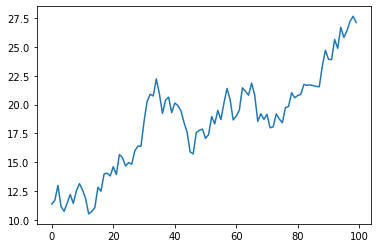

In [60]:
import numpy as np
from matplotlib import pyplot as plt

value = 10


def rw(value):
    data = []
    for i in range(100):
        value = value + np.random.randn()
        data.append(value)

    return(data)

plt.plot(rw(value))
plt.show

### 문제 1.2. : 자기회귀($AutoRegression; AR$) 시계열 만들기


(참고)자기회귀란 현재 $t$기의 값이 ($t-1$)기의 값에 의해 결정받게 되는 과정을 의미합니다.  따라서 다음의 관계가 성립할 때 $AR(p)$ 과정을 따르는 안정적인 시계열이라고 합니다.   

$X_{t}=p*X_{t-1}+\varepsilon_{t}\;\;(\varepsilon_{t}\;\sim\;white\;noise)$

이때 white noise는 평균이 0($E(\varepsilon_{t}=0$), 표준편차($\sigma(\varepsilon_{t}$))가 1를 따르는 난수                        

최초 값이 10에서 20 사이에서 랜덤하게 결정이 될 때,  총 100기간의 랜덤한 $AR(p)$ 시계열을 생성하는(시뮬레이션) 함수를 만들어 주세요.  $AR(0.6)$ 과정을 따르는 경우 다음과 같은 형태의 시계열이 만들어지면 됩니다.
                                                                                                                                     

<function matplotlib.pyplot.show(close=None, block=None)>

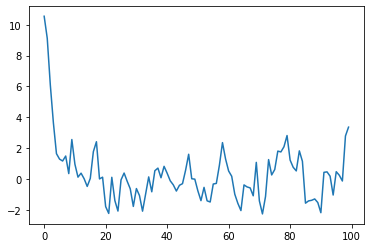

In [87]:
import numpy as np
from matplotlib import pyplot as plt

value = np.random.randint(10, 21)
p = 0.6


def rw(value, p):
    data = []
    for i in range(100):
        value = p*value + np.random.randn()
        data.append(value)

    return(data)

plt.plot(rw(value, p))
plt.show

## 2.1 소개

---

원제는 Bulls and Cows 입니다. Bulls and Cows는 상업적으로 판매되는 보드 게임 마스터 마인드보다 앞서 두 명 이상의 플레이어를 위한 오래된 코드 깨기 마인드 또는 종이 및 연필 게임입니다. 숫자나 단어를 사용하는 1세기 이상 거슬러 올라가는 게임이며 두 명의 상대가 플레이합니다. 일명 숫자 맞추기 게임입니다... (후략) [출처: 나무위키]

## 2.2 규칙

- 1세트당 총 **10번**의 기회가 주어집니다.
- 사용되는 숫자는 **1에서 9까지** 서로 다른 숫자입니다. **중복을 허용하지 않습니다**.
- 숫자는 맞지만 위치가 틀렸을 때는 **볼**입니다.
- 숫자와 위치가 전부 맞으면 **스트라이크**입니다.
- **3 스트라이크**시 게임 종료

### 문제 3.1. 반복문을 활용하여 수익률을 구하기

주가 데이터에 대한 단순 수익률(Simple return)의 산식은 다음과 같다.

$$R_t = {{S_t-S_{t-1}}\over S_{t-1}}$$

**반복문을 활용하여 주어진 삼성전자와 SK하이닉스 두 종목의 단순 수익률(Simple return) 시계열을 구하여라**.

```python
# 수익률을 구하기 위한 변수 생성
Samsung_rt = pd.Series(np.zeros(21))
SKhynix_rt = pd.Series(np.zeros(21))
```

In [5]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import bs4

Samsung_df = fdr.DataReader('005930', '2020-12-01', '2020-12-31')['Close']
Skhynix_df = fdr.DataReader('000660', '2020-12-01', '2020-12-31')['Close']

print(Samsung_df.head())
print(Skhynix_df.head())
print(len(Samsung_df))



Samsung_rt = pd.Series(np.zeros(21))
Skhynix_rt = pd.Series(np.zeros(21))

for t in range(1, 21):
               Samsung_rt[t] = (Samsung_df[t] - Samsung_df[t-1])/Samsung_df[t-1]  
               Skhynix_rt[t] = (Skhynix_df[t] - Skhynix_df[t-1])/Skhynix_df[t-1]
        

Samsung_rt
Skhynix_rt


Date
2020-12-01    67800
2020-12-02    69500
2020-12-03    69700
2020-12-04    71500
2020-12-07    72900
Name: Close, dtype: int64
Date
2020-12-01    100500
2020-12-02    109000
2020-12-03    111500
2020-12-04    115000
2020-12-07    118000
Name: Close, dtype: int64
21


0     0.000000
1     0.084577
2     0.022936
3     0.031390
4     0.026087
5    -0.025424
6     0.047826
7    -0.033195
8    -0.008584
9     0.012987
10    0.004274
11    0.000000
12    0.017021
13   -0.008368
14   -0.021097
15   -0.030172
16    0.031111
17    0.017241
18   -0.021186
19    0.004329
20    0.021552
dtype: float64

두 개의 자산으로 포트폴리오를 구성할 경우 포트폴리오의 수익은 다음과 같다.

$$R_p = w_1r_1+w_2r_2$$

**3.2.1. 주어진 삼성전자와 SK하이닉스 두 종목에 동일가중으로 투자를 하였다 가정할 때 포트폴리오의 수익률을 구하고, 해당 포트폴리오에 100원을 투자하였을 때 투자 종료 시점의 value를 구해라**

```python
# 포트폴리오의 Return과 Value를 구하기 위한 변수생성
Rp = pd.Series(np.zeros(21))
Vp = pd.Series(np.zeros(21))

# 투자시작 시점에 100원으로 시작
Vp[0] = 100
```

```python
def P1(w1, r1, w2, r2):
    for t in range (1, 21):
        Rp[t] = w1*r1[t] + w2*r2[t]
        Vp[t] = Vp[t-1]*(1 + Rp[t])
    return Rp, Vp

P_1 = P1(0.5, Samsung_rt, 
         0.5, SKhynix_rt)
P_1[0], P_1[1][20]
```

**3.2.2. 투자시작 시점에 삼성전자에 전부 투자 후 매일 5%씩 SK하이닉스에 비중을 옮기도록 한다. 만약 두 자산이 동일 비중이 될 경우, 더이상 비중을 옮기지 않도록 할 것이다. 해당 포트폴리오의 Return과 Value를 구하라.**

In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import bs4

Samsung_df = fdr.DataReader('005930', '2020-12-01', '2020-12-31')['Close']
Skhynix_df = fdr.DataReader('000660', '2020-12-01', '2020-12-31')['Close']

print(Samsung_df.head())
print(Skhynix_df.head())
print(len(Samsung_df))



Samsung_rt = pd.Series(np.zeros(21))
Skhynix_rt = pd.Series(np.zeros(21))

R1 = Samsung_rt
R2 = SKhynix_rt
W1 = 1
W2 = 0
delta = 0.05

for t in range(1, 21) :
    Rp[t] = W1*R1[t] + W2*R2[t]
    Vp[t] = Vp[t-1]*(1 + Rp[t])


    if round(W2,2) == round(W1,2) : # W
        pass
    
    else :
        W1 = W1 - delta
        W2 = W2 + delta

print(Rp)
print(Vp[20])

### 문제 4.1. 주식 주문 화면 만들기

---

다음의 요건을 충족하는 함수를 작성해 봅시다.

- 물량을 입력받은 함수 실행 시, 매수 대기 물량과 함께 주문수량 입력창 표시
- 대기수량 < 주문수량 시, "주문 수량이 대기 물량을 초과했습니다." 문구 출력
- 주문수량 <= 0인 경우, "주문 수량은 0보다 커야 합니다." 문구 출력
- 정상 주문 시, "[체결통보] [주문번호: {number}] 매수 {order}주" 문구 출력
- 물량이 소진될 때까지 주문번호를 1씩 증가시키며 위의 과정 반복
- 물량 소진 시 "매수 대기 물량이 없습니다." 문구 출력 후 break

In [88]:
def order(x):
    waiting = x
    index = 1 
    
    while True:
    
        print("매수대기:", waiting)

        if waiting == 0 :
            print("대기물량이 없습니다")
            break
            
        order = int(input("주문수량: "))

        if order > waiting:
            print("주문수량이 대기 물량을 초과했습니다")
            print("--------------------------")

        elif order <= 0:
            print("주문수량은 0보다 커야 합니다")
            print("---------------------")

        elif order <= waiting:
            print("[체결통보] [주문번호:{a}] 매수 {b}주\n".format(a=index, b=order))
            waiting = waiting - order
            index += 1

x = 100
order(x)


매수대기: 100
주문수량: 40
[체결통보] [주문번호:1] 매수 40주

매수대기: 60
주문수량: 20
[체결통보] [주문번호:2] 매수 20주

매수대기: 40
주문수량: 10
[체결통보] [주문번호:3] 매수 10주

매수대기: 30
주문수량: 50
주문수량이 대기 물량을 초과했습니다
--------------------------
매수대기: 30
주문수량: 20
[체결통보] [주문번호:4] 매수 20주

매수대기: 10
주문수량: 10
[체결통보] [주문번호:5] 매수 10주

매수대기: 0
대기물량이 없습니다


### 문제 4.2. 응용문제

---

### 예외 처리

- 입력된 주문수량이 자연수가 아닌 경우, "자연수를 입력하십시오." 문구 출력
- try, except 활용할 것

In [53]:
def order(x):
    waiting = x
    index = 1 
    
    try:
        while True:

            print("매수대기:", waiting)

            if waiting == 0 :
                print("대기물량이 없습니다")
                break

            qnt = int(input("주문수량: "))

            if qnt > waiting:
                print("주문수량이 대기 물량을 초과했습니다")
                print("--------------------------")

            elif qnt <= 0:
                print("주문수량은 0보다 커야 합니다")
                print("---------------------")

            elif qnt <= waiting:
                print("[체결통보] [주문번호:{a}] 매수 {b}주\n".format(a=index, b=qnt))
                waiting = waiting - qnt
                index += 1

        
            
    except ValueError:
        print("자연수를 입력하세요.\n")
        order(x)

x = 100
order(x)

매수대기: 100
주문수량: ads
자연수를 입력하세요.

매수대기: 100
주문수량: 20
[체결통보] [주문번호:1] 매수 20주

매수대기: 80
주문수량: 40
[체결통보] [주문번호:2] 매수 40주

매수대기: 40
주문수량: 50
주문수량이 대기 물량을 초과했습니다
--------------------------
매수대기: 40
주문수량: 10
[체결통보] [주문번호:3] 매수 10주

매수대기: 30
주문수량: 2
[체결통보] [주문번호:4] 매수 2주

매수대기: 28
주문수량: 1
[체결통보] [주문번호:5] 매수 1주

매수대기: 27
주문수량: 23
[체결통보] [주문번호:6] 매수 23주

매수대기: 4
주문수량: 43
주문수량이 대기 물량을 초과했습니다
--------------------------
매수대기: 4
주문수량: 3
[체결통보] [주문번호:7] 매수 3주

매수대기: 1
주문수량: 1
[체결통보] [주문번호:8] 매수 1주

매수대기: 0
대기물량이 없습니다


참고 https://www.notion.so/Week1-Python-Quiz-c110f40ab9f846e2b9e6ab93b5c192dc